# Assumptions Tester

Verifying assumptions:
1. Dependent and Independent variable must show a linear relationship
    1. check visually with pair plot
    2. if not, correct with allowing for polinomial regression line
2. No autocorrelation in residuals (difference btw. outcome and predicted…)
    1. Look at Durbin-Watson-Test in stats models summary: if 2 —> good
    2. if +/- —> centre independent variable by subtracting mean in lagged column
3. No Heteroskedacity (standard error along x axis is non-constant)
    1. check plot of residuals vs. fitted values (can also roughly estimate from the pair plot)
    2. if deviation from regression line increases over x  —> non-linear transformation of dependent variable
4. No Multicollinearity (= all predictor variables should be sufficiently independent from each other, otherwise p- and coefficient values cannot be trusted)
    1. check heatmap for correlation or calculate VIF
    2. if one variable with high multicollinearity —> remove it if you can (just don’t use it)
    3. (might be the case for number of jobs & job density)
5. Residuals must be normally distributed
    1. check histogram of residuals
    
reference: https://github.com/fahadanwar10/LinearRegression/blob/master/media-sales-linear-regression-verify-assumptions.ipynb

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [13]:
df = pd.read_csv("~/library/data/processed/borough-unemployment-and-business-data.csv")
df.drop("Unnamed: 0", axis=1,inplace=True)

In [14]:
df.drop("code", axis=1,inplace=True)
df.drop("area", axis=1,inplace=True)
df.drop("year", axis=1,inplace=True)
df.drop('unemployment_rate', axis=1, inplace=True)
df.head()

,3_year_survival_number,3_year_survival_rate,number_of_jobs,job_density,unemployment_rate,NVQ4_rate,youth_unemployment_rate,no_qualif_rate
0,455.0,54.5,54000,0.45,13.0,33.2,22.734367,8.6
1,1635.0,57.7,147000,0.62,8.0,57.3,9.944418,3.7
2,555.0,58.7,78000,0.53,8.0,29.6,10.870386,4.8
3,1085.0,56.7,115000,0.53,10.8,33.8,14.681718,8.2
4,990.0,62.7,119000,0.61,6.9,47.1,10.269752,5.4


### Linear Regression
- test the fit of geographical factors vs. qualifications to predict youth unemployment 

In [15]:
X=df.drop(['youth_unemployment_rate'],axis=1) #geographical factors set
X.drop('NVQ4_rate', axis=1, inplace=True)
X.drop('no_qualif_rate', axis=1, inplace=True)
X.drop('3_year_survival_number', axis=1, inplace=True) #can be dropped optionally
X.drop('number_of_jobs', axis=1, inplace=True) #to drop to prevent multicollinearity with job density

Y=df.youth_unemployment_rate #youth unemployment set

Z=df.drop(['youth_unemployment_rate'],axis=1)
Z.drop('3_year_survival_number', axis=1, inplace=True) #qualifications factors set
Z.drop('3_year_survival_rate', axis=1, inplace=True)
Z.drop('number_of_jobs', axis=1, inplace=True)
Z.drop('job_density', axis=1, inplace=True)

lr = LinearRegression()
model1=lr.fit(X,Y)
ypred1 = model1.predict(X)
print("R-squared: {0}".format(metrics.r2_score(Y,ypred1)))

R-squared: 0.25463011008210634


In [16]:
model2=lr.fit(Z,Y)
ypred2 = model1.predict(Z)
print("R-squared: {0}".format(metrics.r2_score(Y,ypred2)))
#looks like both can explain fairly little of the variation (probably unemployment_rate would explain more variation than these combined factors)
#but qualifications seem to be able to explain slightly more than geographcal factors
#might be prone to huge selection bias of factors...

R-squared: 0.2810664526748493


### Testing the assumptions for a linear regression

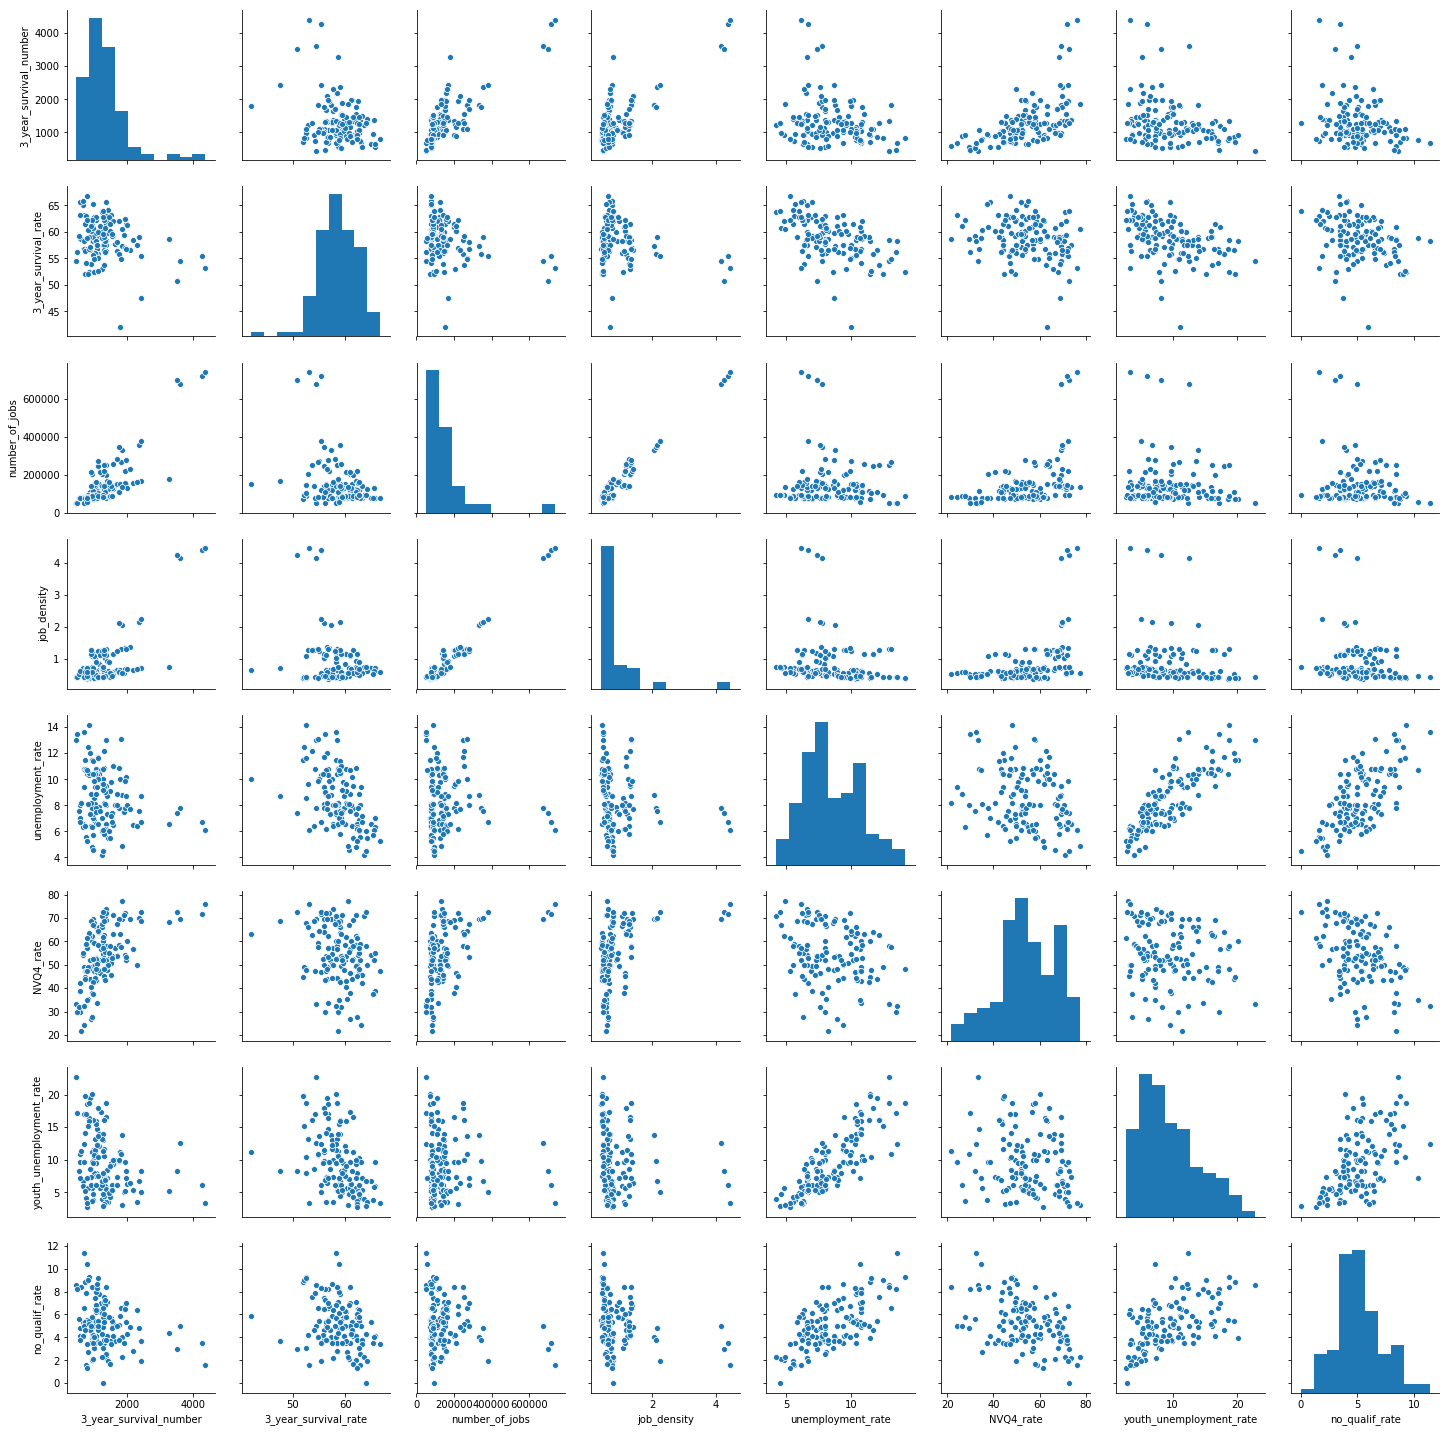

In [5]:
#1 is the relationship linear?
sns.pairplot(data=df)
## --> 3_year_survival_number, number_of_jobs, job_density might be not entirely linearly correlated, but mainly due to quite recognisable outliers

In [ ]:
#probably not necessary
from sklearn.preprocessing import PolynomialFeatures 
   
poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 
   
poly.fit(X_poly, Y) 
X_poly = sm.add_constant(X_poly)
results = sm.OLS(Y,X_poly).fit()
 
print(results.summary())

In [18]:
#2 is the Durbin-Watson-Test=2?
results = sm.OLS(Y,X).fit() #TODO check if this is the right thing to do...
print(results.summary()) 
## --> the Durbin-Watson-Test is smaller than 2, so there might be positive autocorrelation in residuals...

                               OLS Regression Results                              
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.790
Model:                                 OLS   Adj. R-squared:                  0.787
Method:                      Least Squares   F-statistic:                     237.4
Date:                     Sat, 21 Dec 2019   Prob (F-statistic):           1.84e-43
Time:                             15:41:53   Log-Likelihood:                -383.25
No. Observations:                      128   AIC:                             770.5
Df Residuals:                          126   BIC:                             776.2
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

In [19]:
results = sm.OLS(Y,Z).fit() #TODO check if this is the right thing to do...
print(results.summary()) 
## --> the Durbin-Watson-Test is smaller than 2, so there might be positive autocorrelation in residuals...

                               OLS Regression Results                              
Dep. Variable:     youth_unemployment_rate   R-squared:                       0.866
Model:                                 OLS   Adj. R-squared:                  0.863
Method:                      Least Squares   F-statistic:                     405.7
Date:                     Sat, 21 Dec 2019   Prob (F-statistic):           1.24e-55
Time:                             15:42:29   Log-Likelihood:                -354.78
No. Observations:                      128   AIC:                             713.6
Df Residuals:                          126   BIC:                             719.3
Df Model:                                2                                         
Covariance Type:                 nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Text(0, 0.5, 'Residuals')

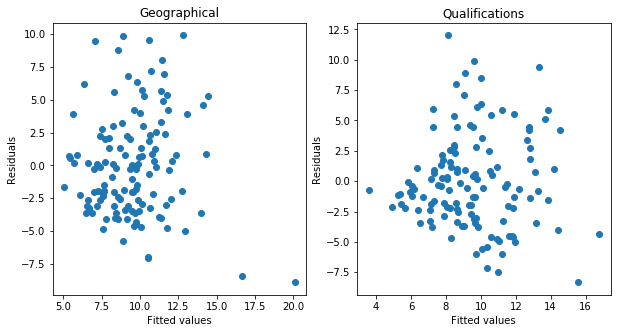

In [22]:
#3 Is there a funnel like shape?
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Geographical")
plt.scatter(ypred1, (Y-ypred1))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

plt.subplot(1,2,2)
plt.title("Qualifications")
plt.scatter(ypred2, (Y-ypred2))
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
#does not look much like a funnel like shape in both cases, but very dispersed residuals

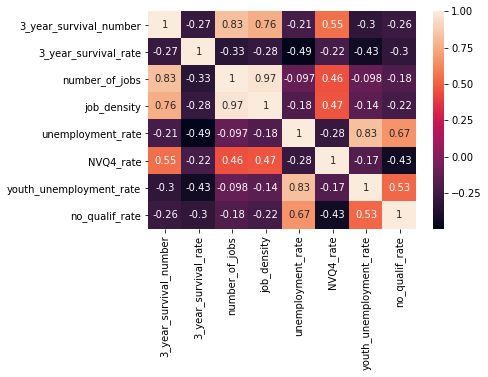

In [23]:
#4 Is one of the predictor variables highly correlated with another one?
sns.heatmap(df.corr(),annot=True)
#there is a high correlation btw. number of jobs and job density --> drop number of jobs (resolves also high correlation with survival rate of businesses)

In [ ]:
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=False, inplace=False)

calculate_vif(X)

Text(0.5, 0, 'Residuals')

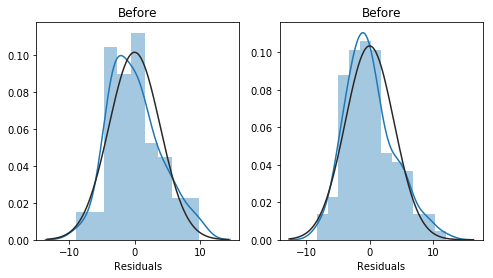

In [23]:
#5 Are the residuals normally distributed?
plt.subplots(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(Y-ypred1 , fit=norm);
plt.xlabel('Residuals')

plt.subplot(1,2,2)
plt.title("Before")
sns.distplot(Y-ypred2 , fit=norm);
plt.xlabel('Residuals')
#both slightly deviate from normal distribution, but maybe not too significantly?